Matplotlib is building the font cache; this may take a moment.


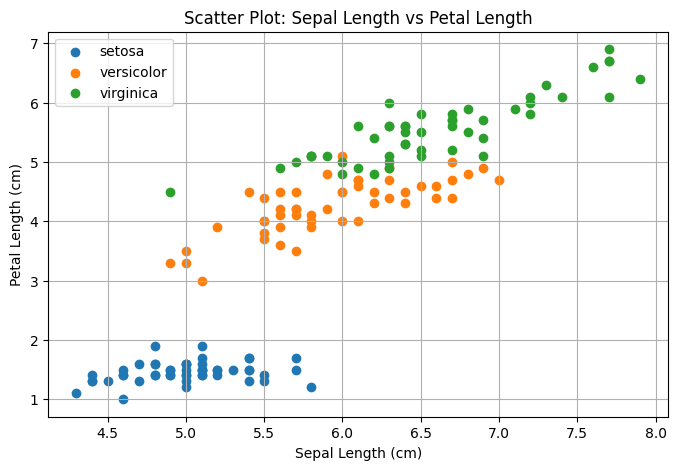

In [3]:
#Task 1: Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris data
iris = load_iris(as_frame=True)
df = iris.frame
df['species'] = df['target'].map(lambda x: iris.target_names[x])

# Scatter plot with matplotlib
plt.figure(figsize=(8, 5))
species = df['species'].unique()

for sp in species:
    subset = df[df['species'] == sp]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=sp)

plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 5.9+ KB


In [6]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


In [7]:
# Clean the dataset (if needed)
df_cleaned = df.dropna()

In [8]:
#Task 2: Basic Data Analysis
# Basic statistics
df_cleaned.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# Group by species and compute the mean only for numeric columns
grouped = df_cleaned.groupby('species').mean(numeric_only=True)
grouped


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [11]:
# Map target values to species names for better readability
df_cleaned['species'] = df_cleaned['target'].map(lambda x: iris.target_names[x])

# Group by species and compute mean sepal length
species_mean = df_cleaned.groupby('species')['sepal length (cm)'].mean()
print("📊 Average Sepal Length by Species:\n", species_mean)


📊 Average Sepal Length by Species:
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64


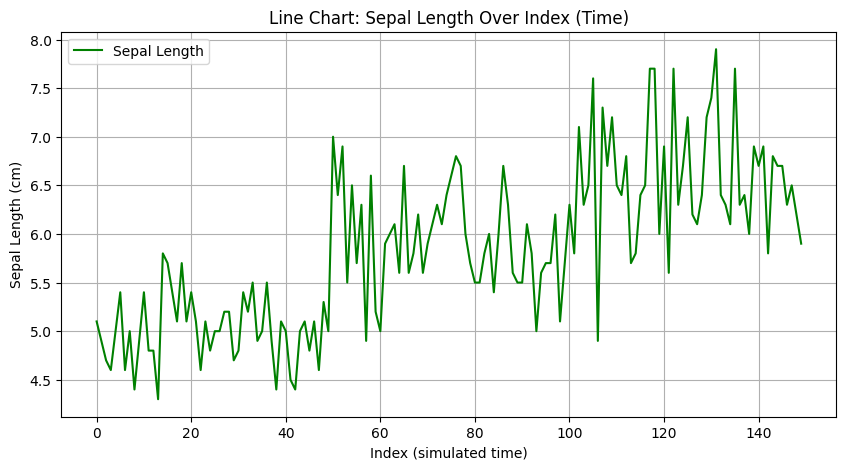

In [12]:
# Task 3: Data Visualization
# Line Chart – (simulated index to represent time trend)
# Simulate time trend with index
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned.index, df_cleaned['sepal length (cm)'], label='Sepal Length', color='green')
plt.title('Line Chart: Sepal Length Over Index (Time)')
plt.xlabel('Index (simulated time)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(True)
plt.show()


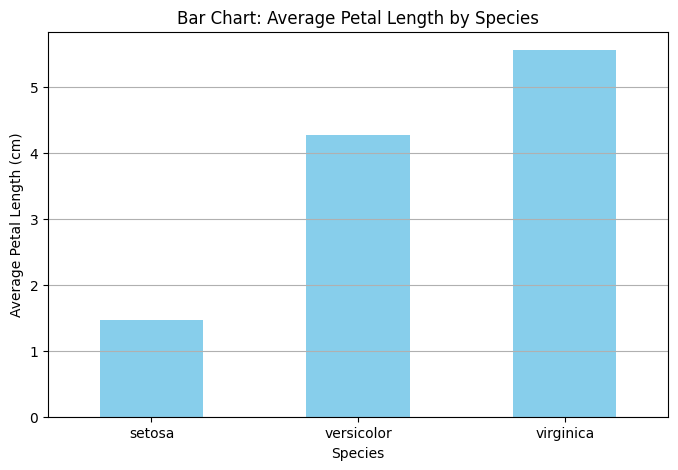

In [13]:
#  Bar Chart – Average Petal Length by Species
species_avg_petal = df_cleaned.groupby('species')['petal length (cm)'].mean().sort_values()

plt.figure(figsize=(8, 5))
species_avg_petal.plot(kind='bar', color='skyblue')
plt.title('Bar Chart: Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


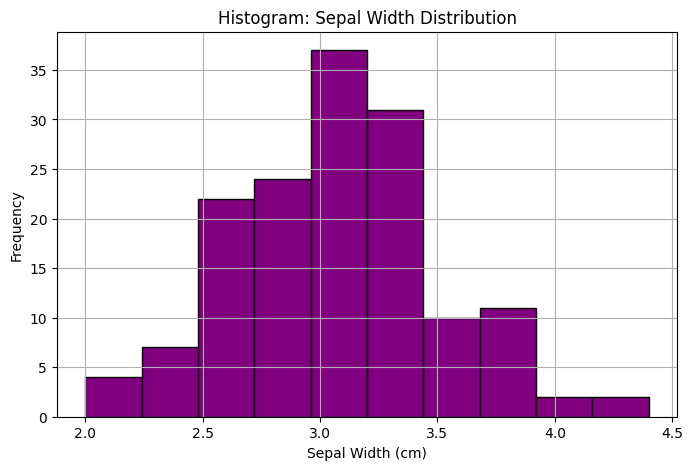

In [14]:
# Histogram – Distribution of Sepal Width
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['sepal width (cm)'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram: Sepal Width Distribution')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


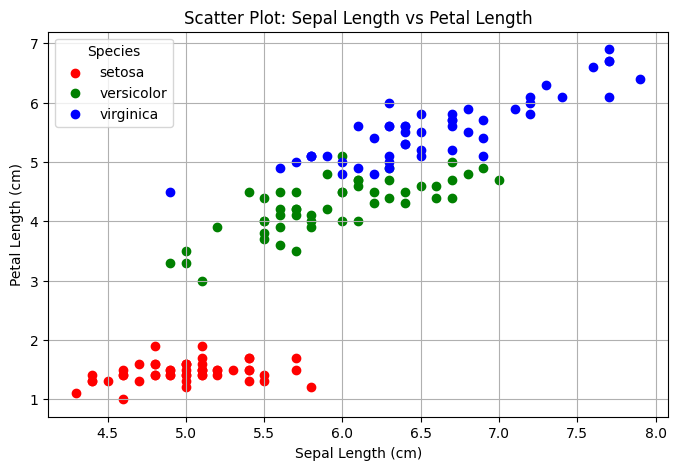

In [16]:
# scatter plot
import matplotlib.pyplot as plt

# Scatter plot with Matplotlib (no seaborn)
species_list = df_cleaned['species'].unique()
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))
for species, color in zip(species_list, colors):
    subset = df_cleaned[df_cleaned['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'],
                label=species, color=color)

plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()
